## Employee Performance Analysis
INX Future Inc.

### Project Summary

#### Requirement

INX Future Inc. is a prominent player in the data analytics and automation industry, boasting a rich legacy of over 15 years in global business operations. However, recent observations have raised concerns about the declining performance indexes of employees, prompting the company's top management to take action.

To address this pressing issue, CEO Mr. Brain has championed a data science initiative aimed at delving deep into the organization's employee data. The primary objective is to unearth the root causes behind the deteriorating performance metrics. Additionally, there's a keen interest in identifying clear indicators that spotlight non-performing employees.

The overarching goal is not merely to identify underperformers for penalization but also to do so in a manner that minimizes any adverse effects on overall employee morale. This delicate balance is crucial to fostering a productive and harmonious work environment.

####  Expecation from this project

**Departmental Performance Analysis**:
Detailed examination of performance metrics across departments to uncover strengths and areas for improvement.

**Indentification of Key Performance Drivers**:
Indentification of the three most influential factors impacting employee performance through thorough data analysis.

**Development of Predictive Model**:
Reation of predective model utilizing machine learning techniques to forecast employee performance based on various input factors. Addionally, 
actionable recommendations will be provided to enhance performance based on insights derived from analysis.

#### Analysis

Our analysis deals with supervised categorical data, including ordinal and nominal predictor variables, with the target variable 'Performance Rating' also being ordinal.
Data processing techniques like Label Encoding and Standardization are applied. Correlation Coefficient helps interpret variable relationships. Key features selected include Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work-Life Balance, and others.
We employ algorithms such as Logistic Regression, SVM, Decision Tree, Random Forest, Naive Bayes, and KNN for training and prediction. We also conduct department-wise performance analysis for deeper insights.

#### Summary

The project aimed to identify factors influencing employee performance, develop a predictive model for accurately forecasting Performance Ratings, analyze data to offer performance improvement recommendations, and derive actionable insights from the analysis.

**Here's a summary of the steps undertaken in the project**:

- **Data Import and Preprocessing**: The provided data was imported and examined to identify predictor and target variables, as well as to check for any missing values.
- **Department-wise Performance Analysis**: An analysis of performance was conducted based on departmental segmentation, as requested.
- **Ordinal Column Label Encoding**: Ordinal columns were encoded using label encoding to prepare the data for analysis.
- **Calculation of Correlation Coefficient and Feature Selection**: Correlation coefficients were calculated to understand the relationships between variables. Important features for analysis were selected based on these correlations.
- **Data Standardization and Train-Test Split**: The data was standardized to ensure uniformity in scale, and then split into training and testing sets for model evaluation
- **Model Training and Evaluation**: Various machine learning algorithms, including Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, and K-Nearest Neighbor, were trained on the data. The accuracy of each model was assessed to determine the best-performing algorithm.
- **Exporting the Best Model**: Finally, the model with the highest accuracy was selected and exported for future use.
   use.

These steps were instrumental in achieving the project's objectives of identifying performance factors, developing a predictive model, and deriving actionable insights for performance improvement.
e improvement.
formance improvement.r performance improvement.is."

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Importing the necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install xlrd

# Data
### Importing Raw data 

In [3]:
# Importing the csv file
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

## Source Code
### Exploratory Data Analysis

In [4]:
data.shape

(1200, 28)

In [5]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [7]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Analysis of Department wise Perfomance

In [8]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept1 = dept.copy()

In [9]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept1.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

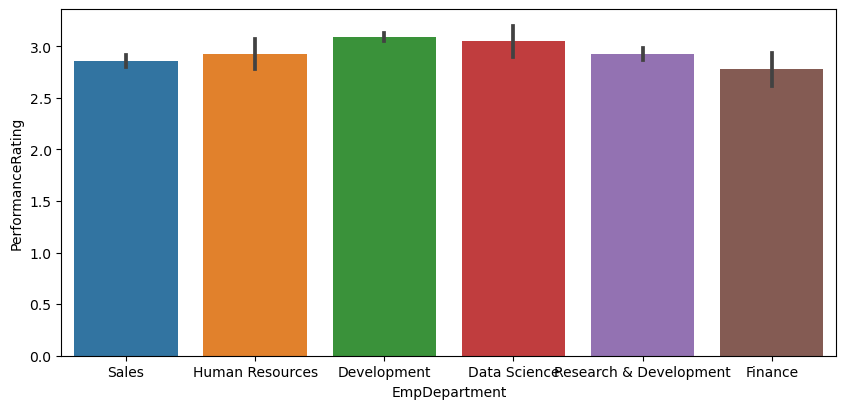

In [10]:
plt.figure(figsize=(10,4.5))
sns.barplot(y=dept1['PerformanceRating'],x=dept1['EmpDepartment'])

In [11]:
# Analyze each department separately
dept1.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [12]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept1['EmpDepartment'])
performance = pd.DataFrame(dept1['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

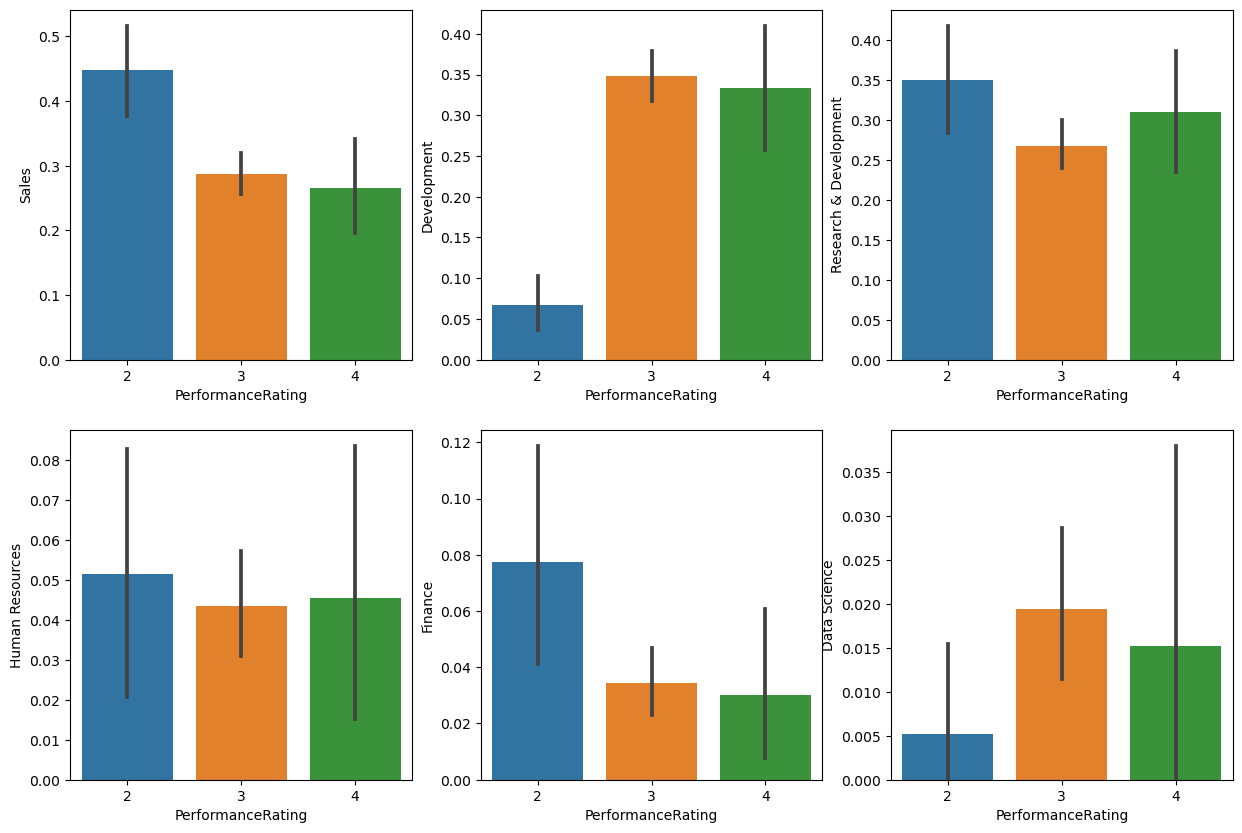

In [13]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Sales'])
plt.subplot(2,3,2)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Development'])
plt.subplot(2,3,3)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Research & Development'])
plt.subplot(2,3,4)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Human Resources'])
plt.subplot(2,3,5)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Finance'])
plt.subplot(2,3,6)
sns.barplot(x=dept_rating['PerformanceRating'],y=dept_rating['Data Science'])
plt.show()

### Distribution of the dataset
In general, one of the first few steps in exploring the data would be to have a rough idea of how the features are distributed with one another. To do so, we shall invoke the familiar kdeplot function from the Seaborn plotting library. The distribution has been done by both numerical and categorical features. it will show the overall idea about the density and majority of data present in a different level.

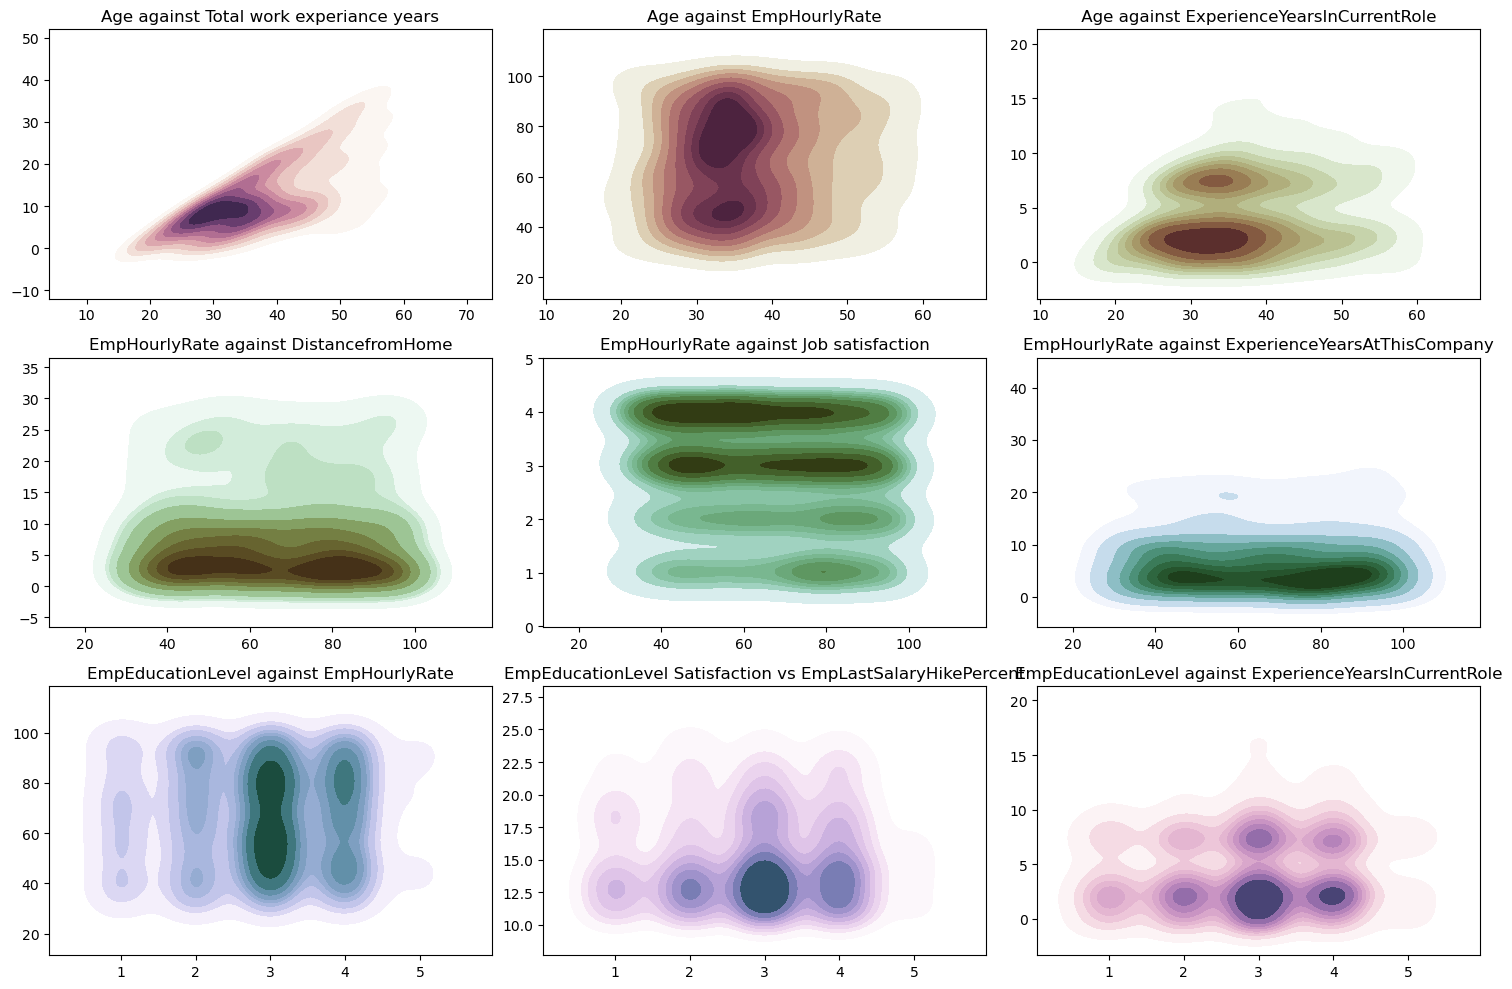

In [18]:
# Plotting the KDEplots
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = data['Age'].values
y = data['TotalWorkExperienceInYears'].values
sns.kdeplot(x=x , y=y , cmap=cmap, shade=True, cut=5 , ax=axes[0,0])
axes[0,0].set( title = 'Age against Total work experiance years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['Age'].values
y = data['EmpHourlyRate'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['Age'].values
y = data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = ' Age against ExperienceYearsInCurrentRole ')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['DistanceFromHome'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'EmpHourlyRate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['EmpJobSatisfaction'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'EmpHourlyRate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['EmpHourlyRate'].values
y = data['ExperienceYearsAtThisCompany'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'EmpHourlyRate against ExperienceYearsAtThisCompany')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['EmpHourlyRate'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'EmpEducationLevel against EmpHourlyRate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['EmpLastSalaryHikePercent'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'EmpEducationLevel Satisfaction vs EmpLastSalaryHikePercent')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = data['EmpEducationLevel'].values
y = data['ExperienceYearsInCurrentRole'].values
sns.kdeplot(x=x , y=y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'EmpEducationLevel against ExperienceYearsInCurrentRole')

f.tight_layout()

### Distribution of Numerical Features
This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.the distribution can be derived or visualized using the density map between the numerical or categorical features present in the data. 

- The age distribution is starting from 18 to 60 where the most of the employees are lying between **30 to 40** age count.
- The distance from home to office is distributing from 0 unit to 30 unit which can be kilometre or mile. The most of the employees are coming from the range of 0 to 5 units.
- Employees are worked in the multiple companies up to **8** companies where most of the employees worked up to **2** companies before getting to work here.
- The hourly rate range is **65 to 95** for majority employees work in this company.
- In General, Most of Employees work up to **5** years in this company.
- Most of the employees get 11%  to 15% of salary hike in this company.

### Distribution of Categorical Features

- The Gender variance is divided by **60%** of Male employees and **40%** of Female employees in the company. 
- The number of the educational backgrounds present in the employees is **six** unique backgrounds.
- nineteen unique employee job roles are present in this company.
- The most of the employees are having the education level of **3**
- The Job satisfaction level in this company is high level for the majority of employees.
- The **85%** of employees are not having attrition in their work
- only **11%** of employees in the company were achieved **level 4** - performance rating 
- The overall percentage of employees doing overtime is **30%**

### Data Processing/ Data Munging

In [14]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
encode = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = encode.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


## Feature Selection    
- There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
- Standardization and Label Encoding was also used for feature transformation.
- A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
- Top 3 factors which affect the employee performance are mentioned below:
1. Employee EnvironmentSatisfaction, 
2. Employee Last Salary Hike Percent 
3. Years Since Last Promotion

In [15]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr(numeric_only=True)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


In [16]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [17]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [18]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [19]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [20]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
X_train.shape

(840, 9)

In [22]:
X_test.shape

(360, 9)

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    pca.explained_variance_ratio_

## Models
- In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor to calculate the accuracy and found out that Random Forest with GridSearchCV gives the maximum accuracy of 93%.

## 1. Logistic Regression

In [23]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [24]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [25]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [26]:
confusion_matrix(y_test,y_predict_log)

array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]], dtype=int64)

## 2. Support Vector Machine

In [27]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [28]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [29]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8444444444444444
              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [30]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]], dtype=int64)

## 3. Decision Tree with GridSearchCV

In [31]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [32]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [33]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [34]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9055555555555556
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [35]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]], dtype=int64)

## 4. Random Forest with GridSearchCV

In [36]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [37]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [38]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [39]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9305555555555556
              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



In [40]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   8,  24]], dtype=int64)

## 5. Naive Bayes Bernoulli

In [41]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [42]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [43]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7944444444444444
              precision    recall  f1-score   support

           2       0.75      0.48      0.58        63
           3       0.80      0.97      0.88       264
           4       0.00      0.00      0.00        33

    accuracy                           0.79       360
   macro avg       0.52      0.48      0.49       360
weighted avg       0.72      0.79      0.74       360



In [44]:
confusion_matrix(y_test,y_predict_nb)

array([[ 30,  33,   0],
       [  8, 256,   0],
       [  2,  31,   0]], dtype=int64)

## 6. K-Nearest Neighbor

In [45]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [46]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [47]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [48]:
confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]], dtype=int64)

### Results

1. **Random Forest Model Performance**:Utilizing GridSearchCV, the Random Forest model achieved an impressive accuracy of 93%.
2. **Positive Correlation with Performance**:Factors such as Environment Satisfaction, Last Salary Hike Percent, and Work-life Balance exhibit positive correlations with Performance Rating. This implies that an increase in these factors is associated with higher performance ratings.
3. **Negative Correlation with Performance**:Conversely, features like Years Since Last Promotion, Experience Years at this Company, Experience Years in Current Role, and Years with Current Manager demonstrate negative correlations with Performance Rating. An increase in these factors corresponds to a decrease in performance ratings
4. **Top 3 Influential Features**:
   - Employee Environment Satisfaction (39.5%)
   - Employee Last Salary Hike Percent (33.3%)
   - Years Since Last Promotion (16.7%)
 

### Analysis and Project Insight

- Out of the 1200 employees, 178 of them going to leave INX Future Inc data analytics company (indicating a 15% attrition rate).
- The employees with educational backgrounds in the field of Life Sciences (37%), Medical (25%) and Marketing (17%), indicating high attrition.
- The maximum number of employees between 26 - 35 age, depicts high attrition (90 employees).
- The employees from the job role of sales executive (44), developer (40), sales representative (24), research scientist (13) and manager R&D (12) show high attrition.
- The 46 employees after gaing two years of work experience they leave the company.
- The low salary hike % of employees (between 10% - 15%) indicates the high attrition rate.

The Random Forest model with GridSearchCV yielded the highest accuracy of 93%. Among the important features, positive correlations were observed with Environment Satisfaction, Last Salary Hike Percent, and Work-life Balance, indicating that an increase in these factors corresponds to higher Performance Ratings. Conversely, negative correlations were found with Years Since Last Promotion, Experience Years at this Company, Experience Years in Current Role, and Years with Current Manager, suggesting that an increase in these factors leads to a decrease in Performance Ratings. Based on these findings, it's evident that fostering a positive work environment, providing regular salary increments, and promoting work-life balance can significantly enhance employee performance. Additionally, periodic managerial rotations may also positively impact performance levels.

### Recommendation

To improve employee performance, the company should focus on:

1. Enhancing the work environment to increase satisfaction.
2. Providing regular salary increments.
3. Supporting work-life balance initiatives.
4. Implementing periodic managerial rotations.

### Final Conclusion

Based on educational background and job roles, the major cause of employee performance issues is job satisfaction and salary hike percentage. Especially, young employees between 26 - 35 age group in the job role of Sales Executive, Developer and others. Therefore, Mr Brain, CEO of INX Future Inc should raise the salary hike percentage (increase to more than 15%) of young employees (between 26 - 35 age) who have at least two years of working experience at the company.
